In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure, legend, plot, show, title, xlabel, ylabel
from sklearn.preprocessing import LabelEncoder
from scipy.stats import normaltest
from scipy.linalg import svd

In [3]:
data=pd.read_csv('diamonds (2).csv', sep=',')

In [4]:
#data quality
data['carat'] = pd.to_numeric(data['carat'], errors='coerce')
data['depth'] = pd.to_numeric(data['depth'], errors='coerce')
data['table'] = pd.to_numeric(data['table'], errors='coerce')
data['x'] = pd.to_numeric(data['x'], errors='coerce')
data['y'] = pd.to_numeric(data['y'], errors='coerce')
data['z'] = pd.to_numeric(data['z'], errors='coerce')
data['price'] = pd.to_numeric(data['price'], errors='coerce')

for col in ['carat', 'depth', 'table', 'x', 'y', 'z', 'price']:
    if data[data[col] < 0].shape[0] > 0:
        print(f"Corrupted data in {col}: ", data[data[col] < 0].shape[0])

for col in ['carat', 'x', 'y', 'z']:
    if data[data[col] == 0].shape[0] > 0:
        print(f"Corrupted data in {col}: ", data[data[col] == 0].shape[0])

expected_cuts = ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']
expected_colors = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
expected_clarity = ['SI1', 'VS2', 'SI2', 'VS1', 'VVS2', 'VVS1', 'IF', 'I1']

if not set(data['cut']).issubset(expected_cuts):
    print("Unexpected values in 'cut'")
if not set(data['color']).issubset(expected_colors):
    print("Unexpected values in 'color'")
if not set(data['clarity']).issubset(expected_clarity):
    print("Unexpected values in 'clarity'")

Corrupted data in x:  8
Corrupted data in y:  7
Corrupted data in z:  20


              carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  


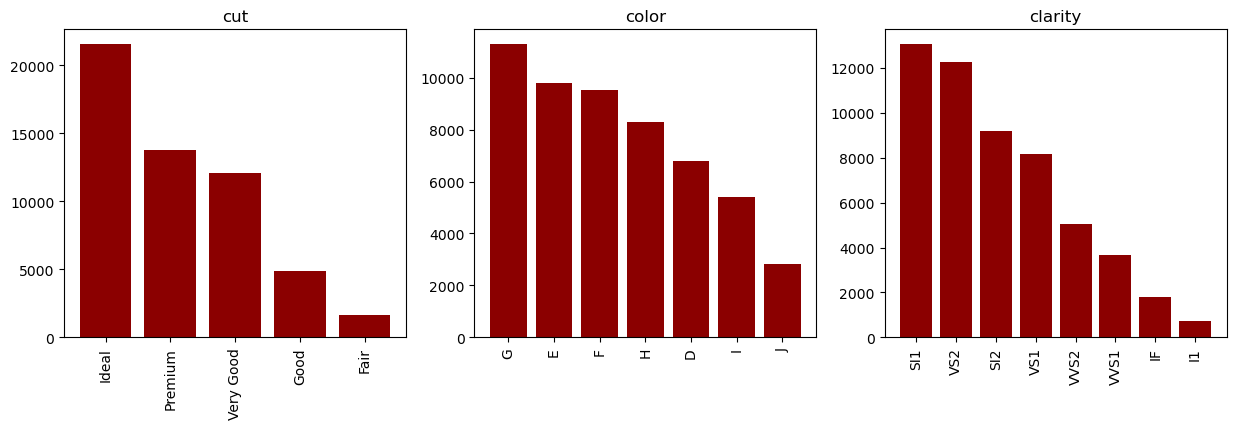

In [5]:
#summary statistics
print(data[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']].describe())

#bar charts for non-numerical attributes
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
cut_counts = data['cut'].value_counts()
axs[0].bar(x=range(len(cut_counts)), height=cut_counts, color='darkred')
axs[0].set_title('cut')
axs[0].set_xticks(range(len(cut_counts)))  # Set the tick positions
axs[0].set_xticklabels(cut_counts.index, rotation=90)  # Set the tick labels with rotation
color_counts = data['color'].value_counts()
axs[1].bar(x=range(len(color_counts)), height=color_counts, color='darkred')
axs[1].set_title('color')
axs[1].set_xticks(range(len(color_counts)))  # Set the tick positions
axs[1].set_xticklabels(color_counts.index, rotation=90)  # Set the tick labels with rotation
clarity_counts = data['clarity'].value_counts()
axs[2].bar(x=range(len(clarity_counts)), height=clarity_counts, color='darkred')
axs[2].set_title('clarity')
axs[2].set_xticks(range(len(clarity_counts)))  # Set the tick positions
axs[2].set_xticklabels(clarity_counts.index, rotation=90)  # Set the tick labels with rotation
plt.savefig('categorical.png')
plt.show()

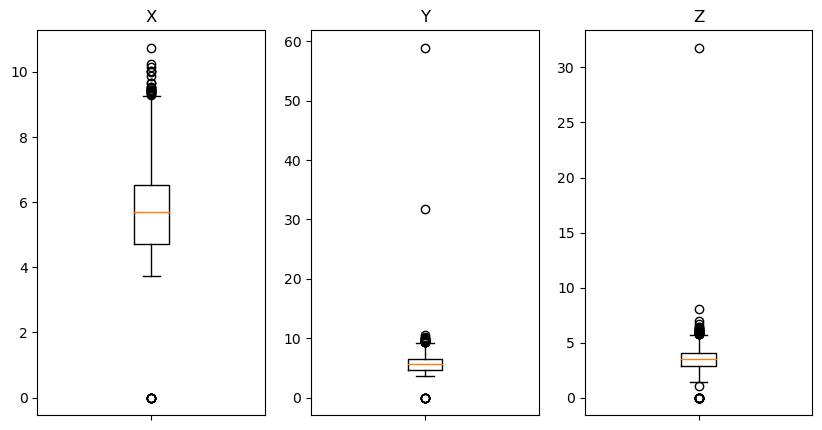

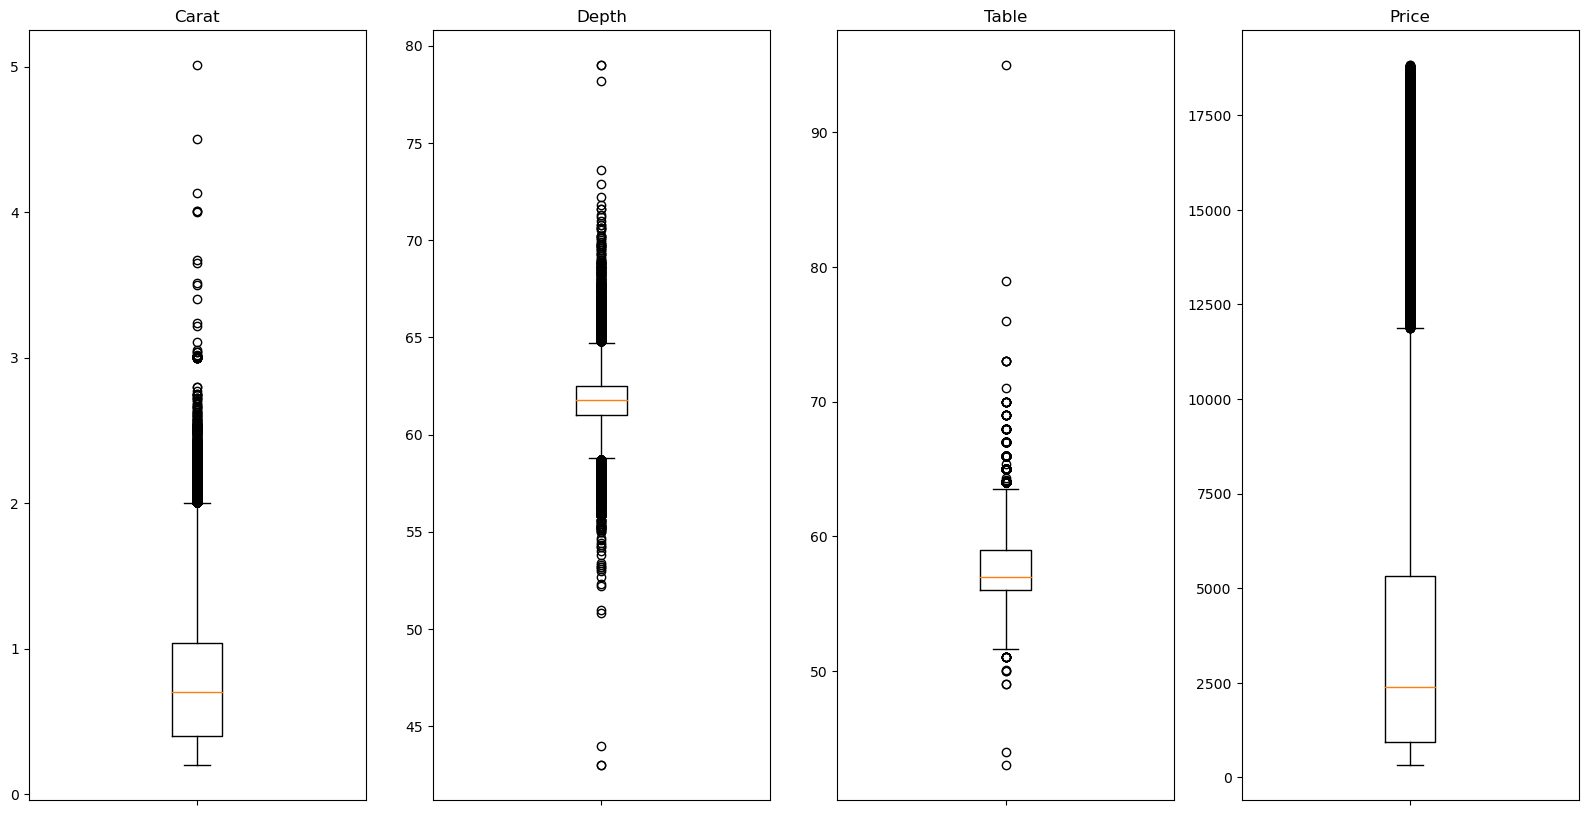

In [6]:
#box plots for numerical data:
fig, axs = plt.subplots(1, 3, figsize=(10, 5))

axs[0].boxplot(data['x'])
axs[0].set_title('X')
axs[0].set_xticklabels([])

axs[1].boxplot(data['y'])
axs[1].set_title('Y')
axs[1].set_xticklabels([])

axs[2].boxplot(data['z'])
axs[2].set_title('Z')
axs[2].set_xticklabels([])
plt.savefig('boxplot_xyz.png')
plt.show()

fig, axs = plt.subplots(1, 4, figsize=(20, 10))

axs[0].boxplot(data['carat'])
axs[0].set_title('Carat')
axs[0].set_xticklabels([])

axs[1].boxplot(data['depth'])
axs[1].set_title('Depth')
axs[1].set_xticklabels([])

axs[2].boxplot(data['table'])
axs[2].set_title('Table')
axs[2].set_xticklabels([])

axs[3].boxplot(data['price'])
axs[3].set_title('Price')
axs[3].set_xticklabels([])
plt.savefig('boxplot_other.png')
plt.show()

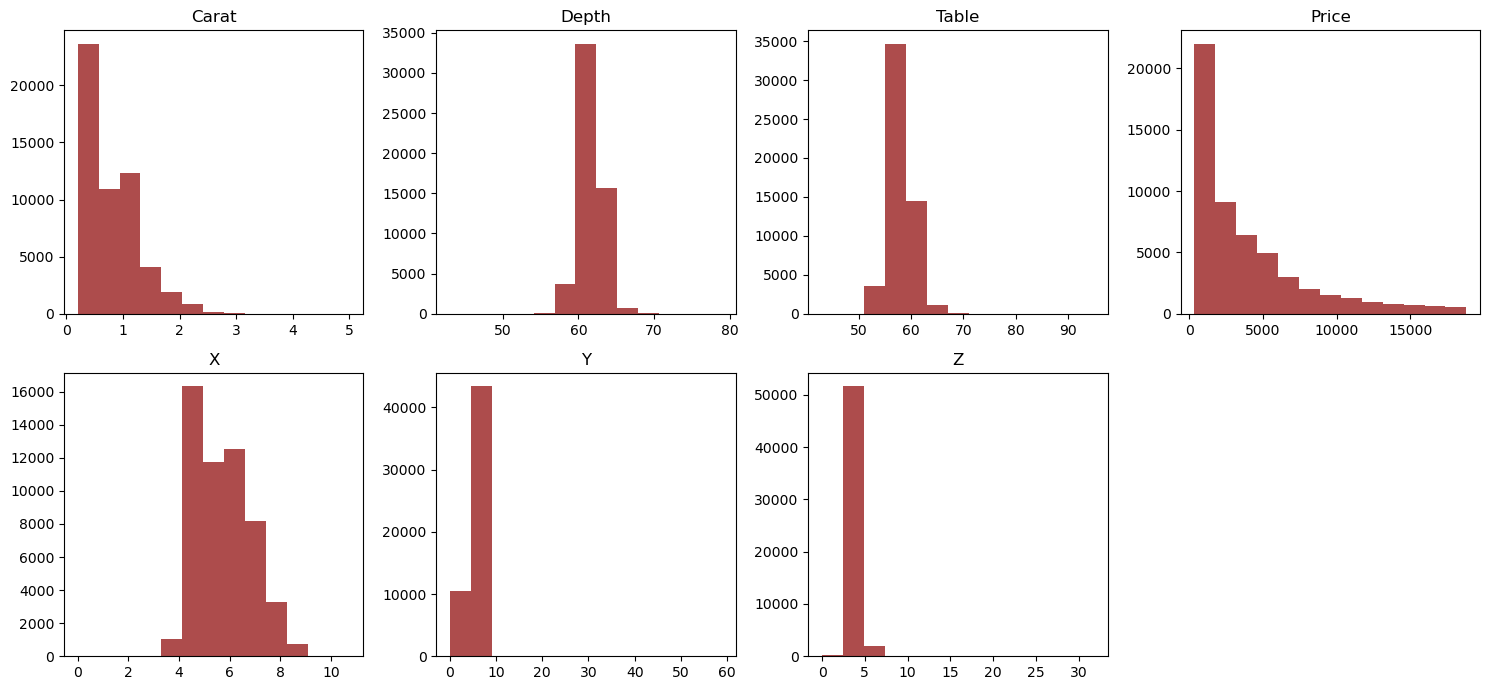

Carat: reject H0
Depth: reject H0
Table: reject H0
Price: reject H0
X: reject H0
Y: reject H0
Z: reject H0


In [7]:
#histograms of numerical data

selected_columns = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
df = pd.DataFrame({col: data[col] for col in selected_columns})
nrows = 2
ncols = 4
fig, axs = plt.subplots(nrows, ncols, figsize=(15, 7))
axs = axs.flatten()
for i, column in enumerate(df.columns):
    ax = axs[i]
    ax.hist(df[column], bins=13, color='darkred', alpha=0.7)
    ax.set_title(column.capitalize())  # Set the title to the column name
for ax in axs[len(df.columns):]:
    ax.axis('off')
plt.tight_layout()
plt.savefig('hist_overview.png')
plt.show()

#normality test
attributes = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
alpha = 0.05
for attribute in attributes:
    statistic, p_value = normaltest(data[attribute])

    if p_value > alpha:
        print(f"{attribute.capitalize()}: fail to reject H0")
    else:
        print(f"{attribute.capitalize()}: reject H0")

In [8]:
#correlation matrix
cormat = data.corr(numeric_only = True)
round(cormat,2)


#numerical values of 'price' are transformed into 'price_category', which takes values from 0 to 10
num_categories = 10
max_price = data['price'].max()
custom_bin_edges = np.linspace(0, max_price, num=num_categories + 1)
custom_bin_edges = np.unique(custom_bin_edges)
custom_bin_edges[-1] = np.inf
labels = range(len(custom_bin_edges) - 1)
data['price_category'] = pd.cut(data['price'], bins=custom_bin_edges, labels=labels, include_lowest=True)


#Dictionary of the price classes and price intervals
classLabels = data['price_category']
classNames=[]
classDict = {}
C=0
for category, interval in enumerate(pd.cut(data['price'], bins=custom_bin_edges).unique()):
    interval_value = str(interval)
    interval_value = interval_value.replace('(', '').replace('[', '').replace(',', ' -').replace(']', '').replace(')', '')  # Remove parentheses and brackets
    classDict[interval_value]=category
    classNames.append(interval_value)
    C=C+1

y = np.asarray(classLabels)

#Creating X data matrix
x_attributes = [0,1,2,3,4,5,7,8,9]
X = data.iloc[:, x_attributes].values
attributeNames = data.columns[x_attributes].tolist()

In [9]:
#Encoding non-numerical ordinal data into integers: 'cut' attribute
cut_values = X[:, 1]
cut_mapping = {
    'Fair': 0,
    'Good': 1,
    'Very Good': 2,
    'Premium': 3,
    'Ideal': 4
}
mapping_func = np.vectorize(lambda x: cut_mapping[x])

# Convert ordinal values to numerical values
cut_values = X[:, 1]
cut_mapping = {
    'Fair': 0,
    'Good': 1,
    'Very Good': 2,
    'Premium': 3,
    'Ideal': 4
}
mapping_func = np.vectorize(lambda x: cut_mapping[x])
cut_numerical = mapping_func(cut_values)
X[:, 1] = cut_numerical

#Encoding non-numerical ordinal data into integers: 'clarity' attribute
clarity_values = X[:,3]
clarity_mapping = {
    'I1': 0,
    'SI2': 1,
    'SI1': 2,
    'VS2': 3,
    'VS1': 4,
    'VVS2': 5,
    'VVS1': 6,
    'IF': 7,
}
mapping_func = np.vectorize(lambda x: clarity_mapping[x])
clarity_numerical = mapping_func(clarity_values)
X[:, 3] = clarity_numerical

#Encoding non-numerical ordinal data into integers: 'color' attribute
color_values = X[:,2]
color_mapping = {
    'D': 0,
    'E': 1,
    'F': 2,
    'G': 3,
    'H': 4,
    'I': 5,
    'J': 6,
}
mapping_func = np.vectorize(lambda x: color_mapping[x])
color_numerical = mapping_func(color_values)
X[:, 2] = color_numerical

#Dimension of X matrix
N,M = X.shape

#Assigning float type to all matrix entries
X = X.astype(float)

#perform singular valio docompoition and create varience plot
X_mean = np.mean(X, axis=0)

X_std = np.std(X, axis=0)

Y = (X - X_mean)/X_std

# PCA by computing SVD of Y
U, S, Vh = svd(Y, full_matrices=False)

# Compute variance explained by principal components
rho = (S * S) / (S * S).sum()

threshold = 0.9

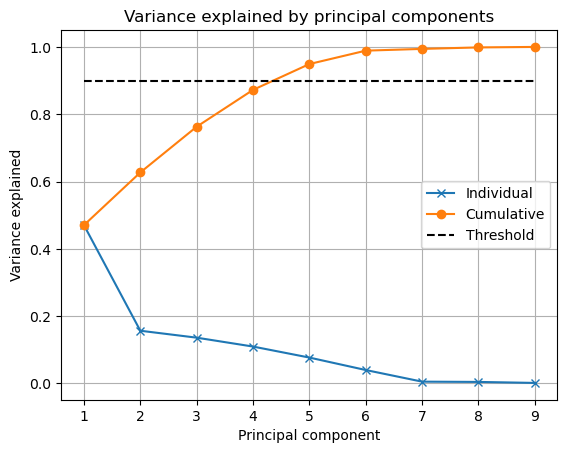

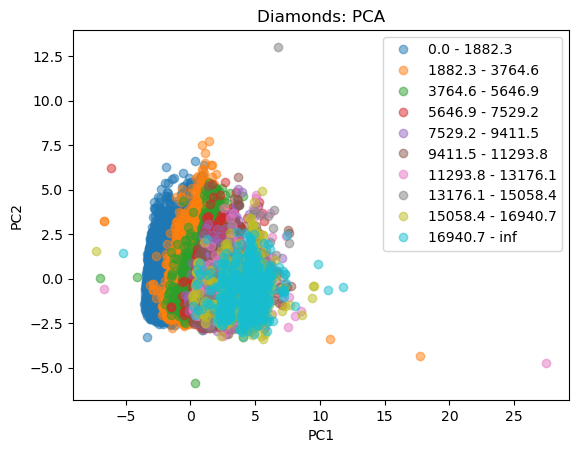

In [10]:
# Plot variance explained
plt.figure()
plt.plot(range(1, len(rho) + 1), rho, "x-")
plt.plot(range(1, len(rho) + 1), np.cumsum(rho), "o-")
plt.plot([1, len(rho)], [threshold, threshold], "k--")
plt.title("Variance explained by principal components")
plt.xlabel("Principal component")
plt.ylabel("Variance explained")
plt.legend(["Individual", "Cumulative", "Threshold"])
plt.grid()

plt.xticks(range(1, len(rho) + 1), [i for i in range(1, len(rho) + 1)])
plt.savefig('varience_explained.png')
plt.show()

#output rho(varience explained)
sum(rho[0:2])

#data projection on pc1 and pc2
V = Vh.T
Z = Y @ V
i = 0
j = 1
f = figure()
title("Diamonds: PCA")
for c in range(C):
    class_mask = y == c
    plot(Z[class_mask, i], Z[class_mask, j], "o", alpha=0.5)
legend(classNames)
xlabel("PC{0}".format(i + 1))
ylabel("PC{0}".format(j + 1))
plt.savefig('pca1_2.png')
show()

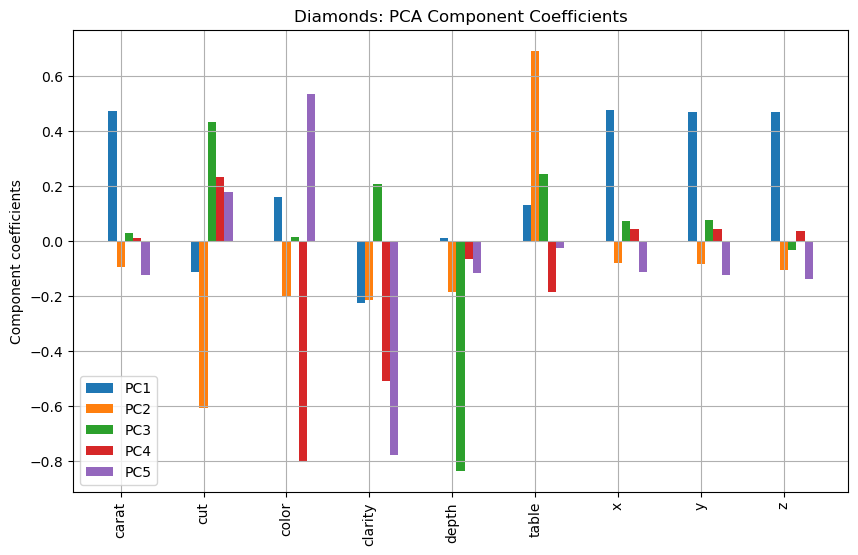

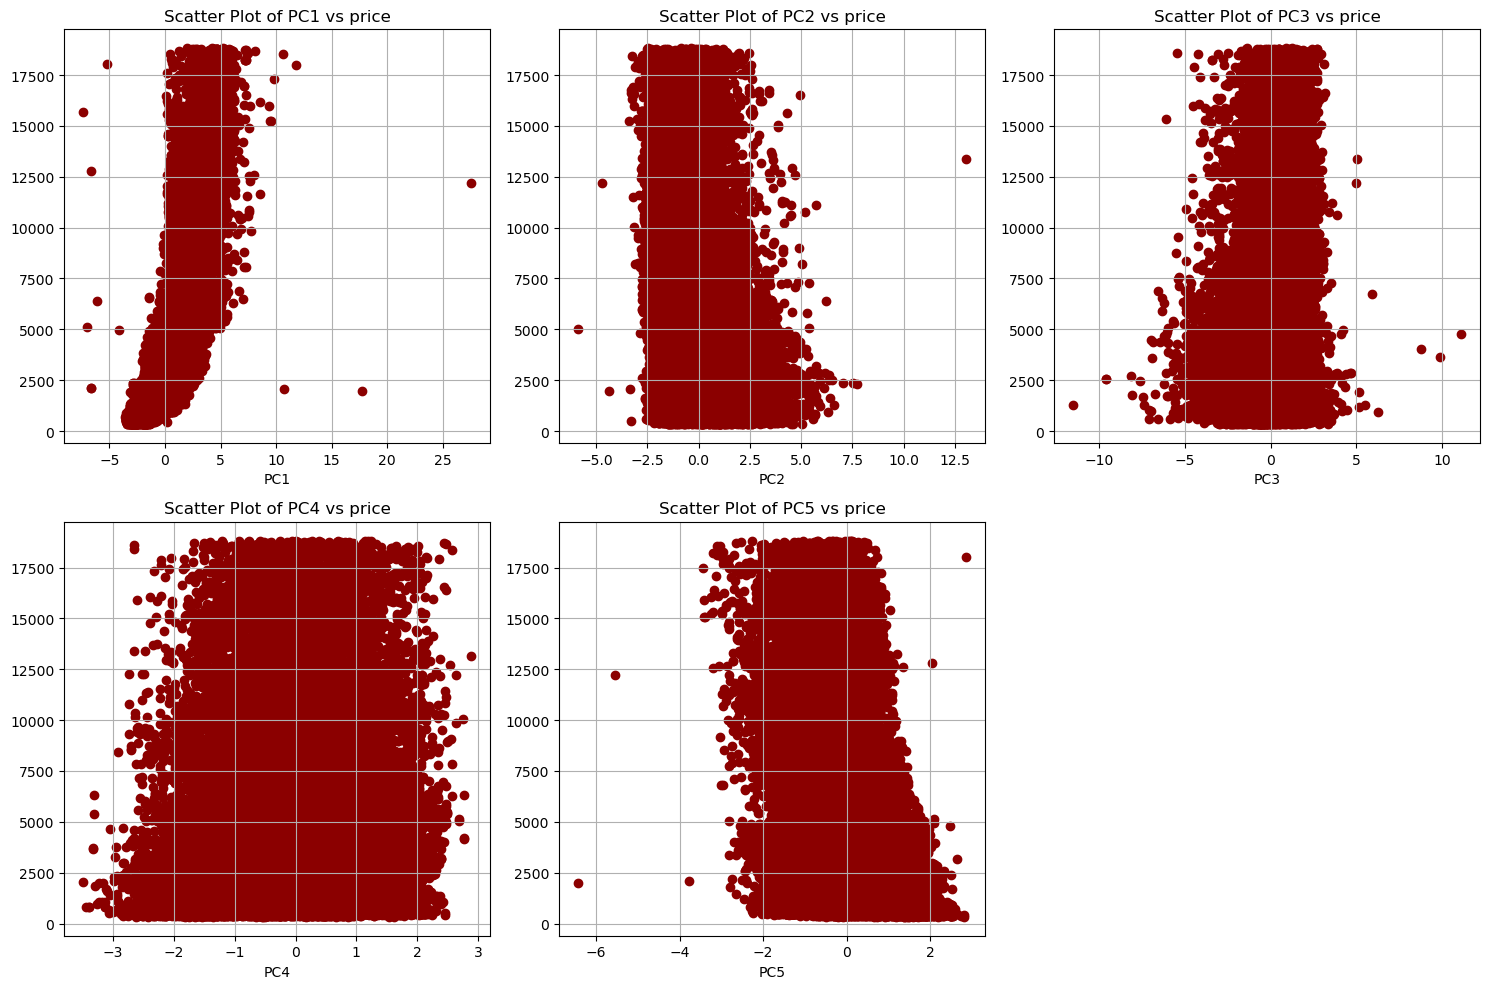

In [11]:
#Vector coefficient plotted for PC1-PC5
pcs = [0, 1, 2,3,4]
legendStrs = ["PC" + str(e + 1) for e in pcs]
c = ["r", "g", "b"]
bw = 0.1
r = np.arange(1, M + 1)
plt.figure(figsize=(10, 6))
for i in pcs:
    plt.bar(r + i * bw, V[:, i], width=bw)
plt.xticks(r + bw, attributeNames, rotation='vertical')
plt.ylabel("Component coefficients")
plt.legend(legendStrs)
plt.grid()
plt.title("Diamonds: PCA Component Coefficients")
plt.savefig('PCAComponentCoef.png')
plt.show()

#eigenvector matrix for PC1-PC5
V_matrix = np.round(V[:, :5], decimals=2)

#S matrix for PC1-PC5
S_matrix = np.round(S[:5], decimals=2)


#plots of price against each of PC1-PC5
fig, axs = plt.subplots(2, 3, figsize=(15, 10))  # 2 rows, 3 columns
PC_values = [np.dot(Y, V[:, i]) for i in range(5)]  # Compute PC values for all 5 principal components
y_values=data['price']
for i in range(2):
    for j in range(3):
        idx = i * 3 + j
        if idx < 5:
            axs[i, j].scatter(PC_values[idx], y_values, color='darkred')
            axs[i, j].set_xlabel('PC{}'.format(idx + 1))
            axs[i, j].set_title('Scatter Plot of PC{} vs price'.format(idx + 1))
            axs[i, j].grid(True)
        else:
            axs[i, j].axis('off')

plt.tight_layout()
plt.savefig('PCAsvsY.png')
plt.show()

In [21]:
#REGRESSION PART A (1)

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Data cleaning
data.replace({'?': np.nan}, inplace=True)

data.dropna(inplace=True)

# Select features and target variable
X = data[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']]
y = data['price']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Column transformer for one-hot encoding categorical features
categorical_cols = ['cut', 'color', 'clarity']
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'
)

# Preprocess the training data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train_preprocessed, y_train)

# Make predictions
y_pred_train = model.predict(X_train_preprocessed)
y_pred_test = model.predict(X_test_preprocessed)

# Evaluate the model
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("Train R^2 Score:", train_r2)
print("Test R^2 Score:", test_r2)


Train RMSE: 1128.6079910485405
Test RMSE: 1135.2505456526587
Train R^2 Score: 0.9199888881379916
Test R^2 Score: 0.9189275789907964


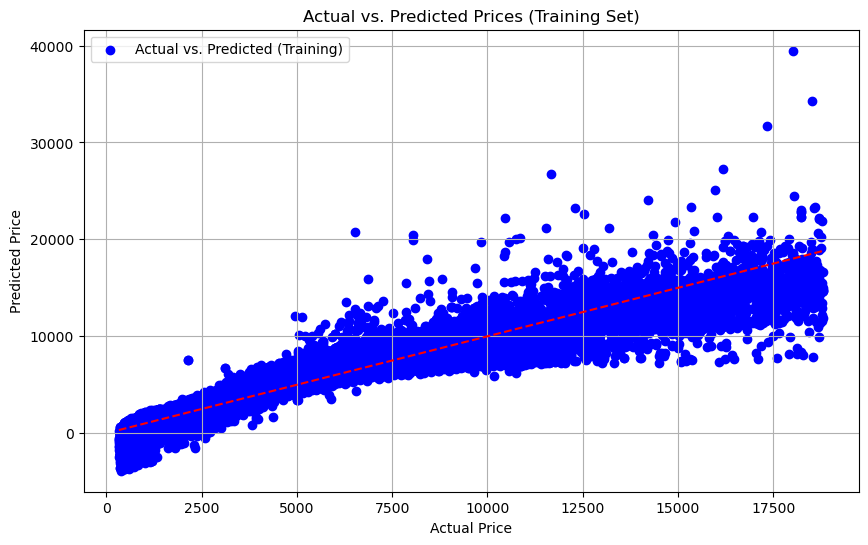

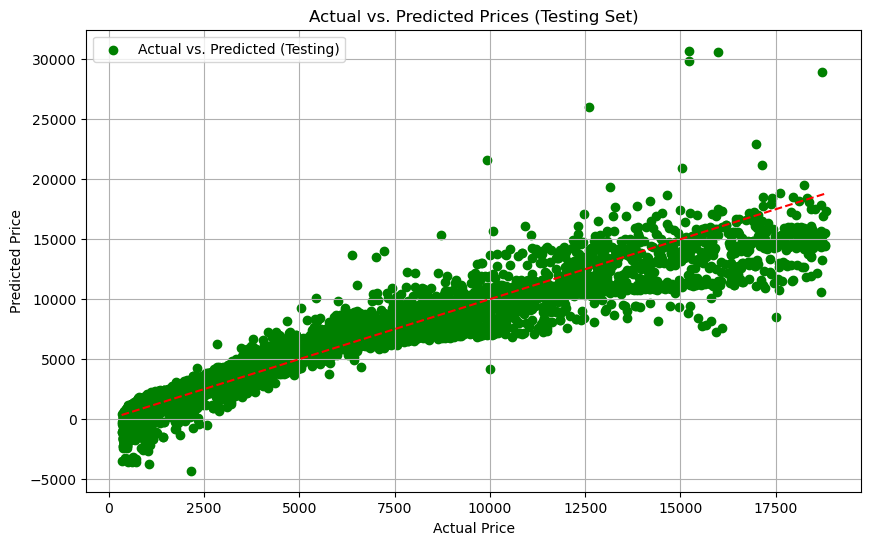

In [22]:
import matplotlib.pyplot as plt

# Scatter plot for training set
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_train, color='blue', label='Actual vs. Predicted (Training)')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices (Training Set)')
plt.legend()
plt.grid(True)
plt.show()

# Scatter plot for testing set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, color='green', label='Actual vs. Predicted (Testing)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices (Testing Set)')
plt.legend()
plt.grid(True)
plt.show()

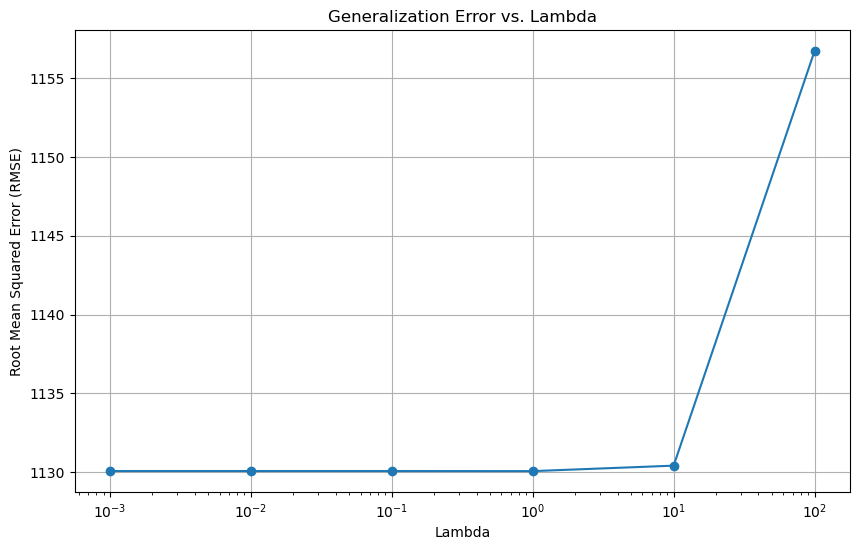

Best Lambda: 100
Test RMSE with the final model: 1154.6492460307718
Coefficients of the final model:
Feature 1: -621.8131687416047
Feature 2: -8.518792426827048
Feature 3: 269.3122534675259
Feature 4: 191.81663684251296
Feature 5: 169.20307085751702
Feature 6: 773.3442182635029
Feature 7: 567.9278462100374
Feature 8: 498.9350736524349
Feature 9: 306.85899421113436
Feature 10: -158.61995739646824
Feature 11: -587.4372784003109
Feature 12: -1401.0088965408775
Feature 13: -3219.6457670684613
Feature 14: 1412.86493154847
Feature 15: -240.75429940500806
Feature 16: -1149.9288924784105
Feature 17: 658.1160114387491
Feature 18: 357.69034639604274
Feature 19: 1123.8408096016194
Feature 20: 1057.81685996711
Feature 21: 9129.442560717098
Feature 22: -31.473575008936926
Feature 23: -25.353294871134118
Feature 24: -171.6226270027802
Feature 25: 20.33933226745165
Feature 26: -32.160749138015944


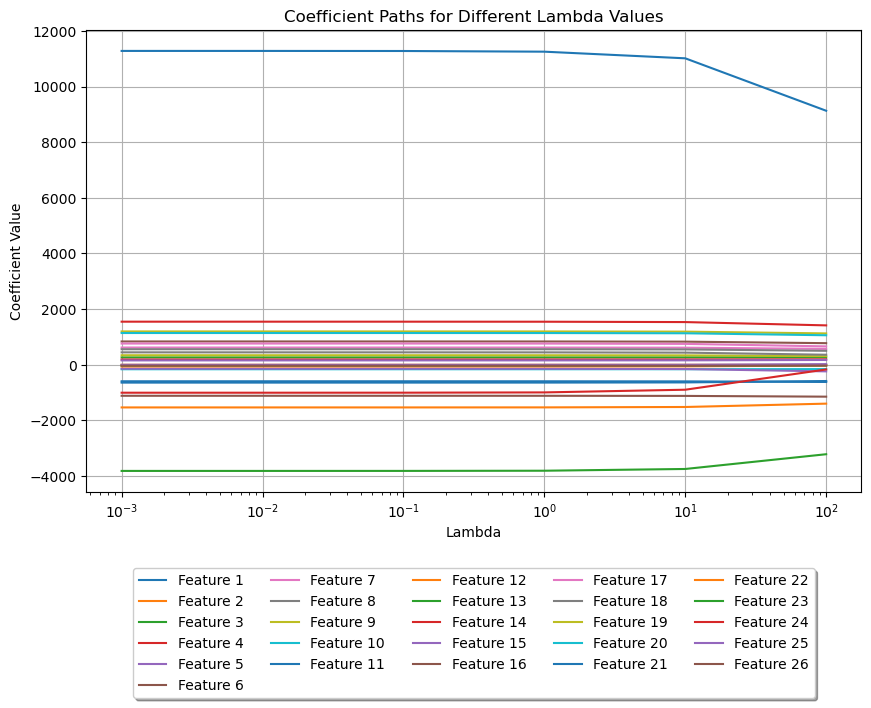

In [24]:
#PART A (2)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error


# Define a range of lambda values
lambda_values = [0.001, 0.01, 0.1, 1, 10, 100]

# Initialize lists to store average cross-validation scores and model coefficients
cv_scores_mean = []
coefficients = []

# Perform Ridge Regression with different lambda values
for lmbda in lambda_values:
    # Initialize Ridge Regression model with the current lambda value
    model = Ridge(alpha=lmbda)
    
    # 10-fold cross-validation
    cv_scores = cross_val_score(model, X_train_preprocessed, y_train, cv=10, scoring='neg_mean_squared_error')
    
    # Compute the average cross-validation score
    cv_score_mean = np.mean(cv_scores)
    cv_scores_mean.append(cv_score_mean)
    
    # Train the model on the entire training set
    model.fit(X_train_preprocessed, y_train)
    
    # Store the coefficients of the trained model
    coefficients.append(model.coef_)

# Plot the estimated generalization error as a function of lambda
plt.figure(figsize=(10, 6))
plt.plot(lambda_values, np.sqrt(np.abs(cv_scores_mean)), marker='o')  # Taking square root of MSE to get RMSE
plt.xlabel('Lambda')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Generalization Error vs. Lambda')
plt.xscale('log')  # Using a logarithmic scale for lambda
plt.grid(True)
plt.show()

# Find the lambda value with the minimum cross-validation error
best_lambda = lambda_values[np.argmin(cv_scores_mean)]
print(f"Best Lambda: {best_lambda}")

# Train the final model using the best lambda value
final_model = Ridge(alpha=best_lambda)
final_model.fit(X_train_preprocessed, y_train)

# Evaluate the final model on the test set
y_pred_test = final_model.predict(X_test_preprocessed)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f"Test RMSE with the final model: {test_rmse}")

print("Coefficients of the final model:")
for i, coef in enumerate(final_model.coef_):
    print(f"Feature {i+1}: {coef}")

# Plot the coefficient paths for different lambda values
plt.figure(figsize=(10, 6))
plt.plot(lambda_values, np.array(coefficients))
plt.xlabel('Lambda')
plt.ylabel('Coefficient Value')
plt.title('Coefficient Paths for Different Lambda Values')
plt.xscale('log')
plt.legend([f'Feature {i+1}' for i in range(len(coefficients[0]))], loc='upper right')

# legend
plt.legend([f'Feature {i+1}' for i in range(len(coefficients[0]))], loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=5)
plt.grid(True)
plt.show()


In [27]:
#REGRESSION PART A (2)

# coefficients = [w1, w2, ..., wn]
# intercept = b

# Define the intercept term obtained from the trained model
intercept = model.intercept_ 

# Define a sample input feature vector
sample_input = [0.3, 0.5, 0.8, 1.2] 

# Initialize the predicted output (y) with the intercept term
predicted_output = intercept

# Add the contribution of each feature to the predicted output
for i in range(len(sample_input)):
    predicted_output += coefficients[i] * sample_input[i]  

print("Predicted Output (y):", predicted_output)

Predicted Output (y): [ -1117.11211776    540.44836153   1288.28281446   1072.9809439
    983.61684752   2890.40527097   2279.63065224   2107.23384285
   1503.16805603     93.96743283  -1250.62676562  -3748.27487258
 -10133.13252523   4880.49474168    147.28972253  -2578.85464501
   2679.84575681   1794.45756402   3899.53810645   3739.50829175
  32104.83545672    371.98296674    479.18925708  -2254.64494235
    543.90415912    451.11484044]


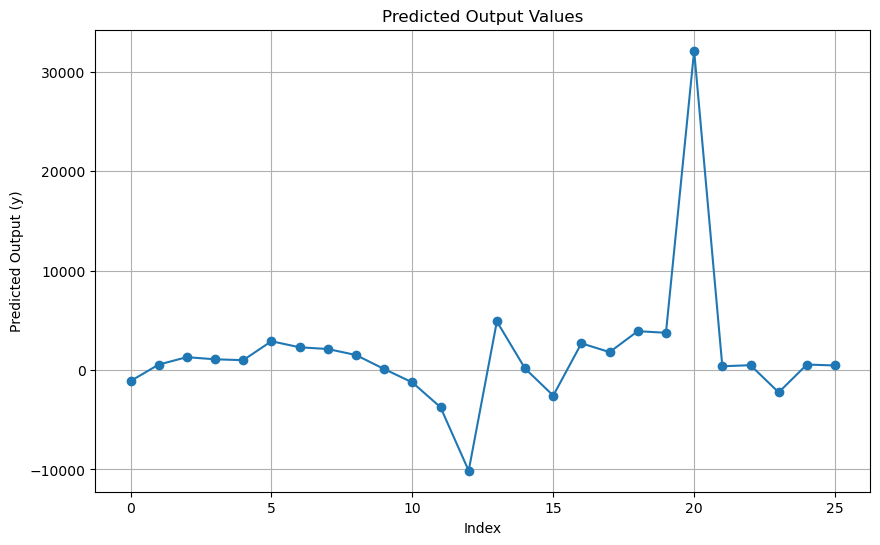

In [28]:
import matplotlib.pyplot as plt


predicted_output_values = [-1117.11211776, 540.44836153, 1288.28281446, 1072.9809439,
                           983.61684752, 2890.40527097, 2279.63065224, 2107.23384285,
                           1503.16805603, 93.96743283, -1250.62676562, -3748.27487258,
                           -10133.13252523, 4880.49474168, 147.28972253, -2578.85464501,
                           2679.84575681, 1794.45756402, 3899.53810645, 3739.50829175,
                           32104.83545672, 371.98296674, 479.18925708, -2254.64494235,
                           543.90415912, 451.11484044]


plt.figure(figsize=(10, 6))
plt.plot(predicted_output_values, marker='o', linestyle='-')
plt.xlabel('Index')
plt.ylabel('Predicted Output (y)')
plt.title('Predicted Output Values')
plt.grid(True)
plt.show()
#predicted output values against their respective indices. 
#Each point on the plot represents the predicted output for a specific data point.